In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import matches_by_teams
matches_by_teams_df = matches_by_teams()

# Análisis

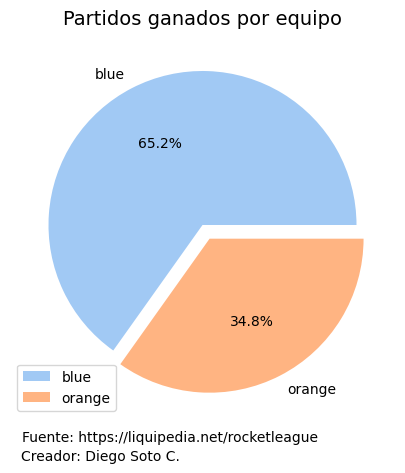

In [3]:
# Agrupamos los partidos ganados por equipo
color_win_group_matches = matches_by_teams_df.groupby('color')[['winner']].sum().reset_index()
# Se crea gráfico de torta
fig,ax = plt.subplots(figsize=(6,5))
colors = sns.color_palette('pastel')
explode = (0, 0.1)
plt.pie(color_win_group_matches.winner,
        labels=color_win_group_matches.color,
        colors=colors,
        autopct = '%1.1f%%',
        explode = explode)
ax.set_title('Partidos ganados por equipo', fontsize=14, x=0.5)

fig.set_facecolor('white') # Cambia el color de fondo, esto principalmente para cuando se guarde el png
ax.text(0.8, -0.05, 'Fuente: https://liquipedia.net/rocketleague', transform=ax.transAxes, horizontalalignment='right', verticalalignment='center', fontsize=10)
ax.text(0.44, -0.1, 'Creador: Diego Soto C.', transform=ax.transAxes, horizontalalignment='right', verticalalignment='center', fontsize=10)

#plt.savefig('assets/PartidosGanadosColor.png') # Esto se utiliza para guardar el gráfico, solo se quita de comentario cuando es necesario
ax.legend()
plt.show()

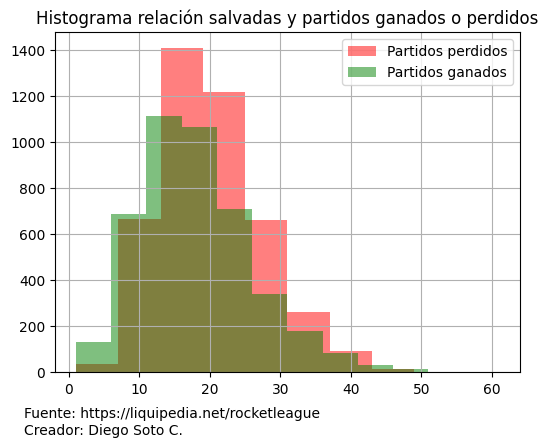

In [4]:
fig,ax = plt.subplots(figsize=(6,5))
# Se crea un histograma para los partidos perdidos con color rojo y ganados con color verde
matches_by_teams_df[matches_by_teams_df['winner'] == False]['core_saves'].hist(alpha=0.5, label='Partidos perdidos', color='red')
matches_by_teams_df[matches_by_teams_df['winner'] == True]['core_saves'].hist(alpha=0.5, label='Partidos ganados', color='green')
ax.set_title(label='Histograma relación salvadas y partidos ganados o perdidos', fontsize=12, x=0.5)

fig.subplots_adjust(bottom=0.2)  # ajusta el margen inferior para dejar espacio para los textos
fig.set_facecolor('white') # Cambia el color de fondo, esto principalmente para cuando se guarde el png
ax.text(0.57, -0.12, 'Fuente: https://liquipedia.net/rocketleague', transform=ax.transAxes, horizontalalignment='right', verticalalignment='center', fontsize=10)
ax.text(0.275, -0.17, 'Creador: Diego Soto C.', transform=ax.transAxes, horizontalalignment='right', verticalalignment='center', fontsize=10)

plt.legend()
#plt.savefig('assets/HistogramaSalvadasGanadosPerdidos.png') # Esto se utiliza para guardar el gráfico, solo se quita de comentario cuando es necesario
plt.show()

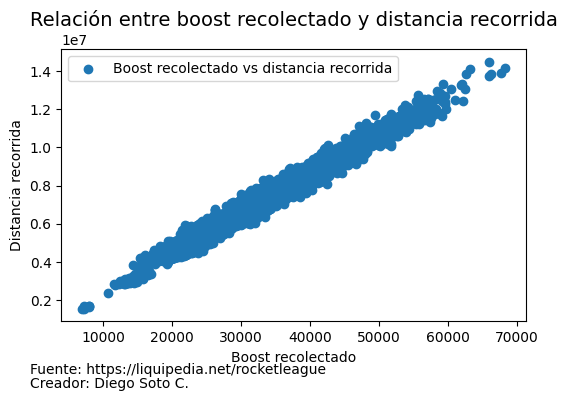

In [5]:
x = matches_by_teams_df['boost_amount_collected']
y = matches_by_teams_df['movement_total_distance']
fig,ax = plt.subplots(figsize=(6,4))
plt.scatter(x=x, y=y, label='Boost recolectado vs distancia recorrida')
ax.set_title(label='Relación entre boost recolectado y distancia recorrida', fontsize=14, x=0.5)
plt.xlabel('Boost recolectado')
plt.ylabel('Distancia recorrida')

fig.subplots_adjust(bottom=0.2)  # ajusta el margen inferior para dejar espacio para los textos
fig.set_facecolor('white') # Cambia el color de fondo, esto principalmente para cuando se guarde el png
ax.text(0.57, -0.18, 'Fuente: https://liquipedia.net/rocketleague', transform=ax.transAxes, horizontalalignment='right', verticalalignment='center', fontsize=10)
ax.text(0.275, -0.23, 'Creador: Diego Soto C.', transform=ax.transAxes, horizontalalignment='right', verticalalignment='center', fontsize=10)
#plt.savefig('assets/RelaciónBoostDistancia.png') # Esto se utiliza para guardar el gráfico, solo se quita de comentario cuando es necesario

plt.legend()
plt.show()

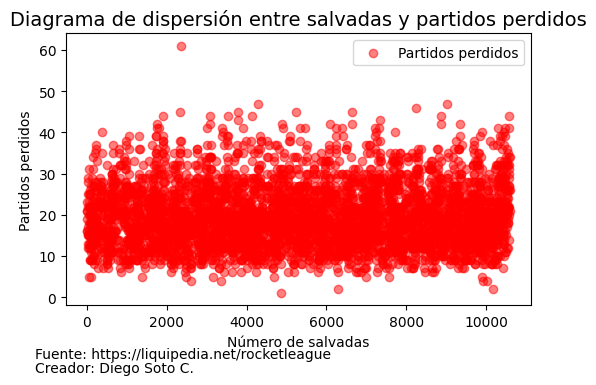

In [6]:
# Filtrar los partidos perdidos y el número de salvadas en base a los partidos perdidos
x = matches_by_teams_df[matches_by_teams_df['winner'] == False]
y = x['core_saves']

# Crear gráfico
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(x=x.index, y=y, alpha=0.5, label='Partidos perdidos', color='red')
ax.set_title(label='Diagrama de dispersión entre salvadas y partidos perdidos', fontsize=14, x=0.5)
ax.set_xlabel('Número de salvadas')
ax.set_ylabel('Partidos perdidos')

fig.subplots_adjust(bottom=0.2)  # ajusta el margen inferior para dejar espacio para los textos
fig.set_facecolor('white') # Cambia el color de fondo, esto principalmente para cuando se guarde el png
ax.text(0.57, -0.18, 'Fuente: https://liquipedia.net/rocketleague', transform=ax.transAxes, horizontalalignment='right', verticalalignment='center', fontsize=10)
ax.text(0.275, -0.23, 'Creador: Diego Soto C.', transform=ax.transAxes, horizontalalignment='right', verticalalignment='center', fontsize=10)
#plt.savefig('assets/DiagramaSalvadasPerdidos.png') # Esto se utiliza para guardar el gráfico, solo se quita de comentario cuando es necesario

plt.legend()
plt.show()

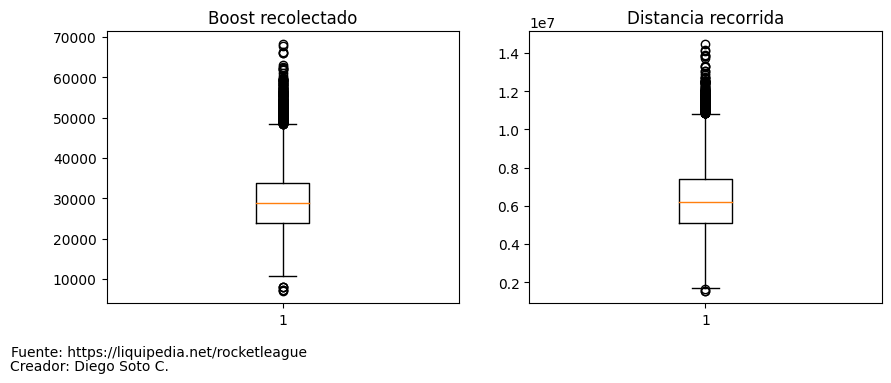

In [7]:
# Como pudimos ver anteriormente, estas columnas tienen datos nulos, y al intentar hacer el gráfico con los datos nan, realmente no mostraba el resultado del gráfico.
# Para resolver esto, se verificó la mediana de cada columna y luego con el método fillna() se reemplazaron las filas nulas con este dato
x_median = matches_by_teams_df['boost_amount_collected'].median()
y_median = matches_by_teams_df['movement_total_distance'].median()
x = matches_by_teams_df['boost_amount_collected'].fillna(x_median)
y = matches_by_teams_df['movement_total_distance'].fillna(y_median)

# Se crearán 2 subplots para mostrar un diagrama por cada variable
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))

# Primer boxplot con boost recolectado
ax[0].boxplot(x)
ax[0].set_title('Boost recolectado')

# Segundo boxplot con distancia recorrido
ax[1].boxplot(y)
ax[1].set_title('Distancia recorrida')

fig.subplots_adjust(bottom=0.2)  # ajusta el margen inferior para dejar espacio para los textos
fig.set_facecolor('white') # Cambia el color de fondo, esto principalmente para cuando se guarde el png
ax[0].text(0.57, -0.18, 'Fuente: https://liquipedia.net/rocketleague', transform=ax[0].transAxes, horizontalalignment='right', verticalalignment='center', fontsize=10)
ax[0].text(0.177, -0.23, 'Creador: Diego Soto C.', transform=ax[0].transAxes, horizontalalignment='right', verticalalignment='center', fontsize=10)
#plt.savefig('assets/GráficosOutliersBoost.png') # Esto se utiliza para guardar el gráfico, solo se quita de comentario cuando es necesario

plt.show()

# Parte 2

In [8]:
win_group_matches = matches_by_teams_df.groupby('team_name')[['winner']].sum().sort_values('winner', ascending=False).reset_index()
group_team_region = matches_by_teams_df.groupby('team_name')[['team_region']].first().reset_index()
win_group_matches = win_group_matches.merge(group_team_region, on='team_name', how='left')
win_group_matches.head(10)

,team_name,winner,team_region
0,G2 ESPORTS,62,North America
1,TOKYO VERDY ESPORTS,60,Asia-Pacific North
2,TEAM BDS,56,Europe
3,FURIA ESPORTS,56,South America
4,PIRATES EXDEE,53,Sub-Saharan Africa
5,NRG ESPORTS,51,North America
6,TEAM FALCONS,50,Middle East & North Africa
7,RENEGADES,49,Oceania
8,DETONATOR,48,Asia-Pacific North
9,FAZE CLAN,47,North America


In [9]:
# Se realizará el análisis separado por región, para esto cada df se almacenarán en un diccionario donde la clave será el nombre de la región
# Crear un diccionario vacío para almacenar los resultados y un array con las regiones
region_results = {}
regions = matches_by_teams_df['team_region'].unique()

# Con un for se hará un filtro de cada región y luego con el mismo procedimiento anterior se creará un df por cada región
for region in regions:
    # Filtrar el DataFrame por región
    matches_by_region = matches_by_teams_df[matches_by_teams_df['team_region'] == region]

    win_group_matches = matches_by_region.groupby('team_name')[['winner']].sum().sort_values('winner', ascending=False).reset_index()
    group_team_region = matches_by_region.groupby('team_name')[['team_region']].first().reset_index()
    win_group_matches = win_group_matches.merge(group_team_region, on='team_name', how='left')

    # Agregar los resultados al diccionario
    region_results[region] = win_group_matches.head(10)

    # Las siguientes líneas solo se agregaron para crear un output de todas las regiones
    #print(f"Resultados para la región: {region}\n")
    #print(region_results[region].to_string(index=False))
    #print("\n")

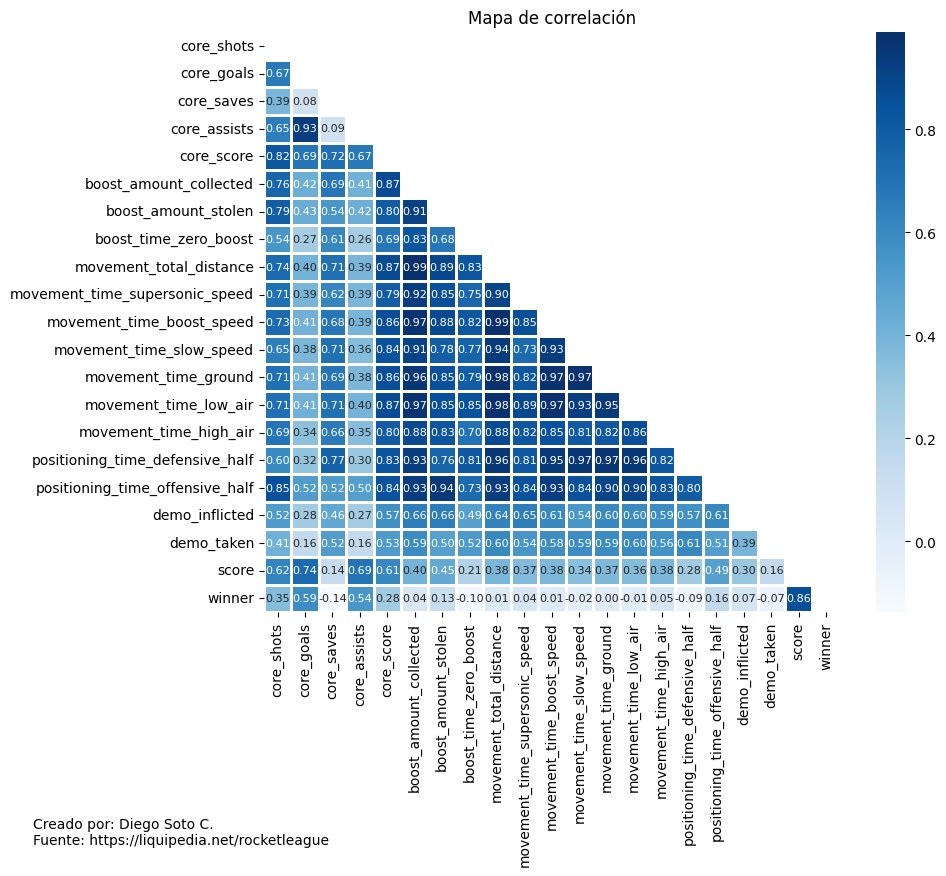

In [10]:
# Se realizará una copia del df porque se eliminarán las columnas string
df_copia = matches_by_teams_df.copy()
df_copia = df_copia.drop(columns=['color', 'team_id', 'team_name', 'team_region'])

#Correlaciones
fig, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(df_copia.corr(), dtype=bool))
sns.heatmap(df_copia.corr(), mask=mask, fmt=".2f", annot=True, annot_kws={"fontsize": 8}, lw=1, cmap='Blues')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.title('Mapa de correlación')

plt.subplots_adjust(bottom=0.3, left=0.3)  # ajusta los márgenes inferior y izquierdo para dejar espacio para los textos
fig.set_facecolor('white') # Cambia el color de fondo, esto principalmente para cuando se guarde el png
plt.text(-0.4, -0.4,
         'Creado por: Diego Soto C.\nFuente: https://liquipedia.net/rocketleague',
         ha='left', transform=ax.transAxes)

#plt.savefig('assets/Corr_matches_by_team.png', bbox_inches='tight', dpi=300) # Esto se utiliza para guardar el gráfico, solo se quita de comentario cuando es necesario
plt.show()

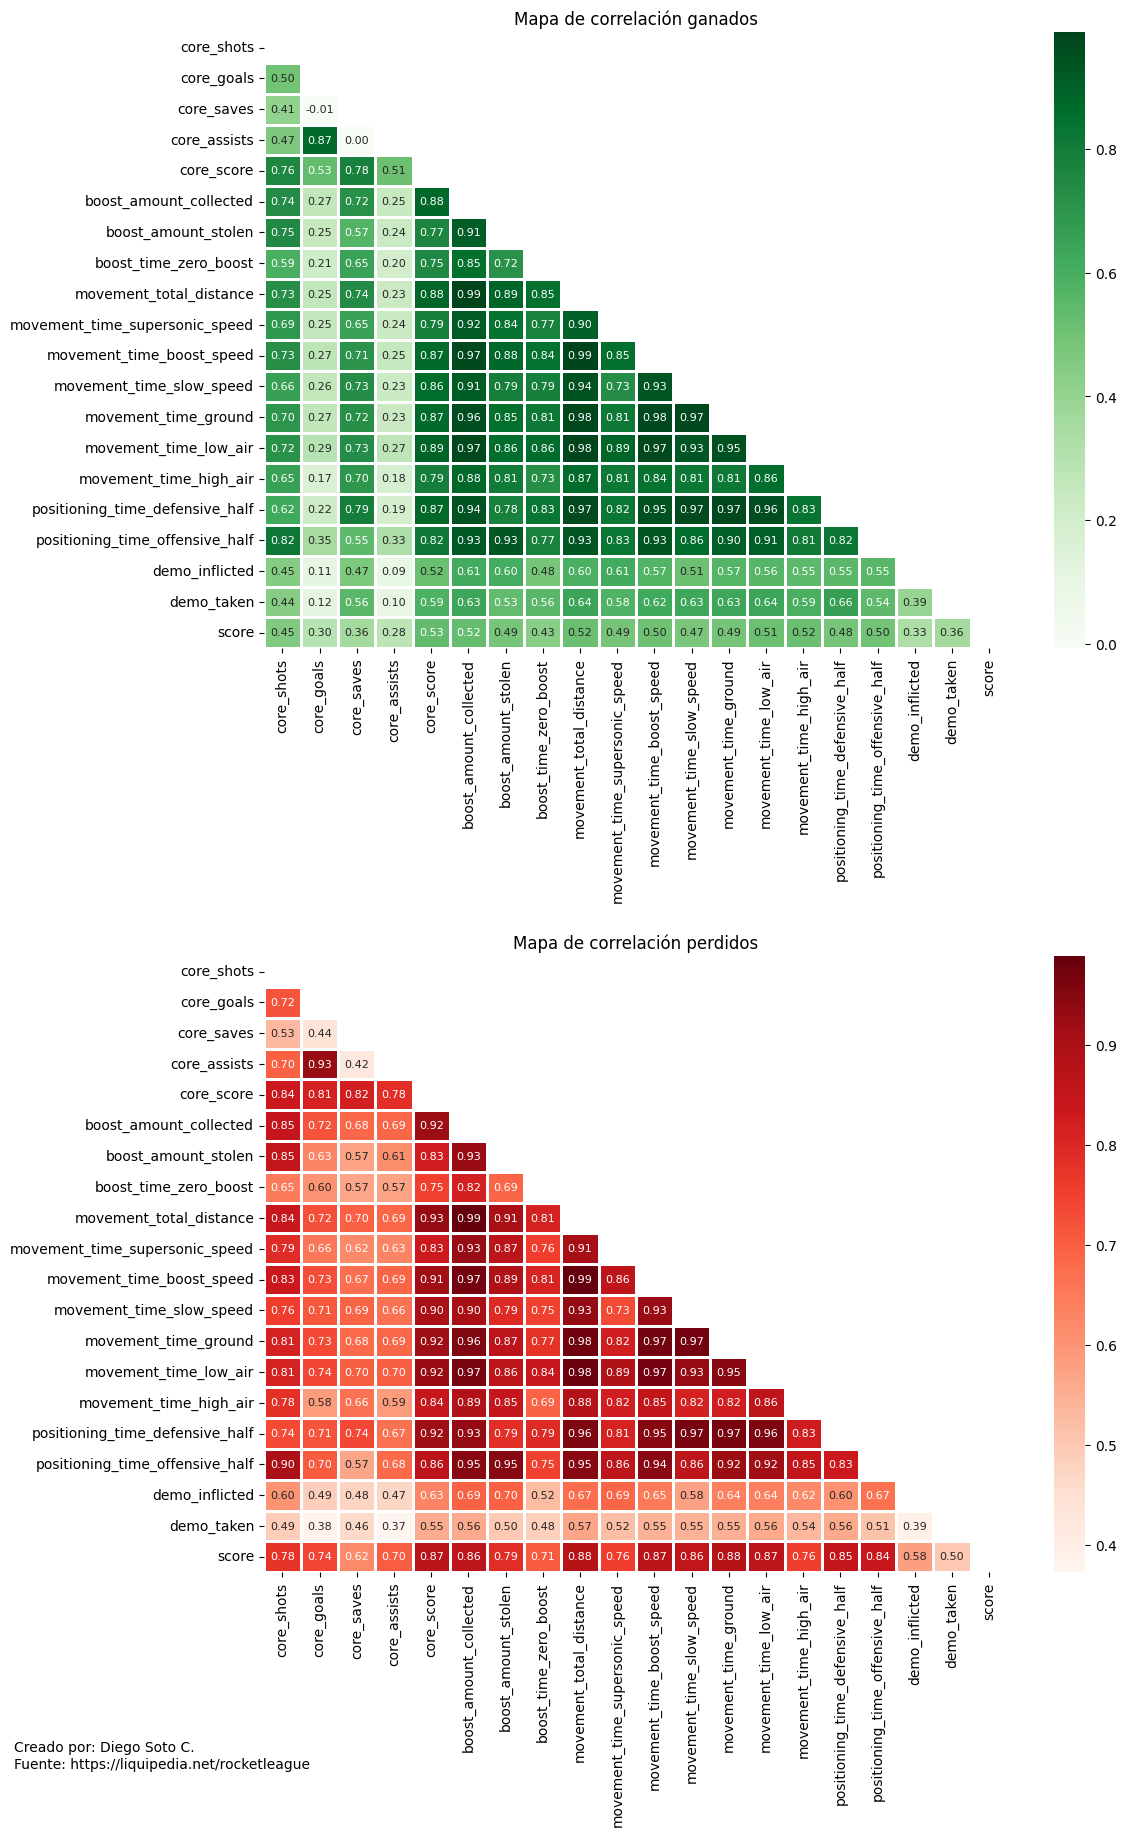

In [29]:
# Se realizará una copia del df porque se eliminarán las columnas string
df_copia = matches_by_teams_df.copy()
df_copia = df_copia.drop(columns=['color', 'team_id', 'team_name', 'team_region'])

# Crea nuevos df por partidos ganados y otro por perdidos
matches_winner = df_copia[df_copia['winner'] == True]
matches_winner = matches_winner.drop(columns=['winner'])
matches_loser = df_copia[df_copia['winner'] == False]
matches_loser = matches_loser.drop(columns=['winner'])

# Crear heatmaps para cada subconjunto de datos
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 20))

# Heatmap para partidos ganados
mask = np.triu(np.ones_like(matches_winner.corr(), dtype=bool))
sns.heatmap(matches_winner.corr(), mask=mask, fmt=".2f",
            annot=True, annot_kws={"fontsize": 8}, lw=1,
            cmap='Greens', ax=ax1)
ax1.set_title('Mapa de correlación ganados')

# Heatmap para partidos perdidos
mask = np.triu(np.ones_like(matches_loser.corr(), dtype=bool))
sns.heatmap(matches_loser.corr(), mask=mask, fmt=".2f",
            annot=True, annot_kws={"fontsize": 8}, lw=1,
            cmap='Reds', ax=ax2)
ax2.set_title('Mapa de correlación perdidos')

fig.subplots_adjust(hspace=0.5)  # ajusta el espacio entre los subplots
fig.set_facecolor('white') # Cambia el color de fondo, esto principalmente para cuando se guarde el png

plt.text(-0.6, -0.4,
         'Creado por: Diego Soto C.\nFuente: https://liquipedia.net/rocketleague',
         ha='left', transform=ax.transAxes)

#plt.savefig('assets/Corr_matches_by_team_winner.png', bbox_inches='tight', dpi=300) # Esto se utiliza para guardar el gráfico, solo se quita de comentario cuando es necesario

plt.show()